# Read-me

- In this notebook, we observe and compare our predictions for the test set.
- We compare our developed baselines with our two ensembles methods.
- Our analysis is described in 'Evaluate' cell

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
from sklearn.model_selection import train_test_split
from lib.utils import *
import pickle

# Load data

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
X_test = np.load('data/input/X_test.npy')
y_test = np.load('data/input/y_test.npy')

In [14]:
y_pred_ensemble = np.load('data/input/y_pred_ensemble.npy')
y_pred_ensemble_no_treat = np.load('data/input/y_pred_ensemble_no_treat.npy')
y_pred_decision_tree = np.load('data/input/y_pred_decision_tree.npy')
y_pred_logistic_regression = np.load('data/input/y_pred_logistic_regression.npy')
y_pred_random_forest = np.load('data/input/y_pred_random_forest.npy')
y_pred_rule = np.load('data/input/y_pred_rule.npy')

# Evaluate

- From the confusion matrices, it can be seen that the best model was the untreated ensemble. This could possibly have occurred because SMOTE can generate overfitting. 
- In the context of fraud, it is common to want to find the best amount of fraud possible. The untreated ensemble model had the lowest number of false negatives and lost little compared to the false positives of the model with SMOTE.
- Regarding the baseline models, the best result was obtained with RandomForests, which is expected since it is a robust model. 
- Interestingly, the rule-based model obtained the best number of true positives. But it failed considerably to find the non-fraud class and got many false positives. This can be bad, as it would generate a lot of false alarms. 

### Ensemble-SMOTE

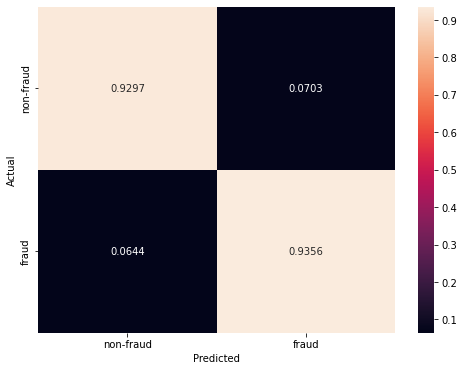

In [15]:
plot_confusion_matrix(y_test, y_pred_ensemble)

### Ensemble

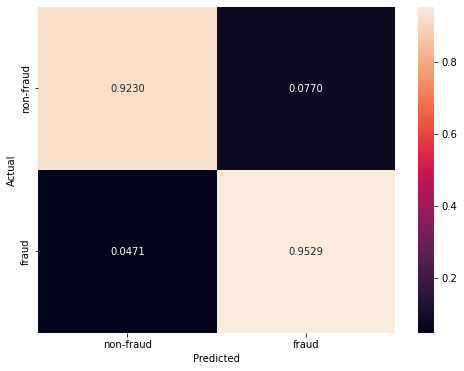

In [16]:
plot_confusion_matrix(y_test, y_pred_ensemble_no_treat)

### DecisionTree

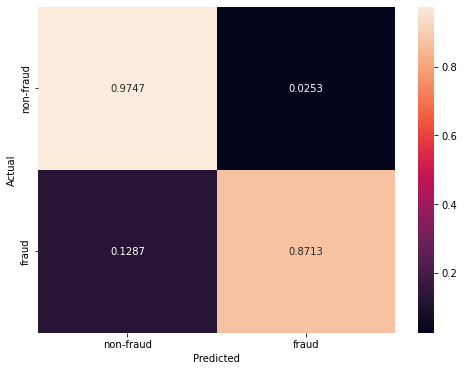

In [7]:
plot_confusion_matrix(y_test, y_pred_decision_tree)

### LogisticRegression

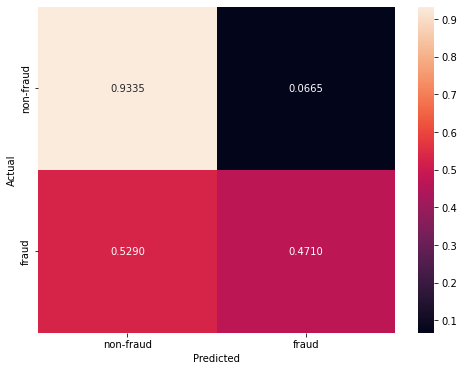

In [8]:
plot_confusion_matrix(y_test, y_pred_logistic_regression)

### RuleBased

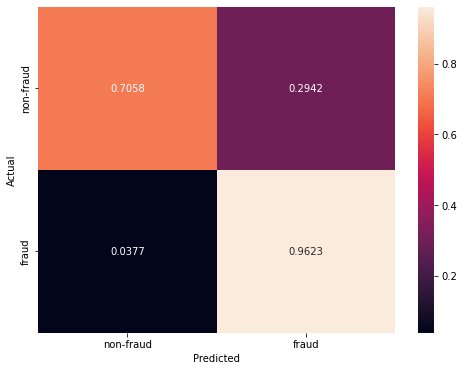

In [9]:
plot_confusion_matrix(y_test, y_pred_rule)

### RandomForest

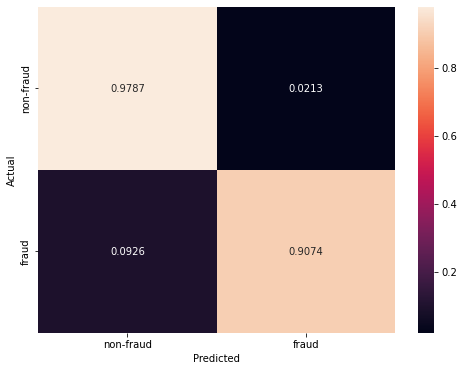

In [10]:
plot_confusion_matrix(y_test, y_pred_random_forest)

## F1-Score, Recall, Precision, Average precision-recall, AUC

- With respect to f1-score, ROC AUC Score, and average precision-score, the best model is still the Ensemble model without treatment. 
- The worst model was the rule-based model in respect to average precision-recall score. 

### Ensemble-SMOTE

In [11]:
print_results(y_test, y_pred_ensemble)

Classification report:
              precision    recall  f1-score   support

           0     0.9911    0.9286    0.9588      4779
           1     0.6365    0.9372    0.7581       637

    accuracy                         0.9297      5416
   macro avg     0.8138    0.9329    0.8585      5416
weighted avg     0.9494    0.9297    0.9352      5416

ROC AUC Score:
	 0.9806
Average precision-recall score:
	 0.8524


### Ensemble

In [12]:
print_results(y_test, y_pred_ensemble_no_treat)

Classification report:
              precision    recall  f1-score   support

           0     0.9932    0.9230    0.9568      4779
           1     0.6226    0.9529    0.7531       637

    accuracy                         0.9265      5416
   macro avg     0.8079    0.9380    0.8550      5416
weighted avg     0.9496    0.9265    0.9329      5416

ROC AUC Score:
	 0.9817
Average precision-recall score:
	 0.865


### RandomForest

In [28]:
print_results(y_test, y_pred_random_forest)

Classification report:
              precision    recall  f1-score   support

           0     0.9875    0.9787    0.9831      4779
           1     0.8500    0.9074    0.8778       637

    accuracy                         0.9703      5416
   macro avg     0.9188    0.9430    0.9304      5416
weighted avg     0.9714    0.9703    0.9707      5416

ROC AUC Score:
	 0.9888
Average precision-recall score:
	 0.8825


### DecisionTree

In [25]:
print_results(y_test, y_pred_decision_tree)

Classification report:
              precision    recall  f1-score   support

           0     0.9827    0.9747    0.9787      4779
           1     0.8210    0.8713    0.8454       637

    accuracy                         0.9625      5416
   macro avg     0.9019    0.9230    0.9120      5416
weighted avg     0.9637    0.9625    0.9630      5416

ROC AUC Score:
	 0.9229
Average precision-recall score:
	 0.7302


### LogisticRegression

In [26]:
print_results(y_test, y_pred_logistic_regression)

Classification report:
              precision    recall  f1-score   support

           0     0.9298    0.9335    0.9316      4779
           1     0.4854    0.4710    0.4781       637

    accuracy                         0.8791      5416
   macro avg     0.7076    0.7022    0.7048      5416
weighted avg     0.8775    0.8791    0.8783      5416

ROC AUC Score:
	 0.9268
Average precision-recall score:
	 0.5355


### RuleBased

In [27]:
print_results(y_test, y_pred_rule)

Classification report:
              precision    recall  f1-score   support

           0     0.9929    0.7058    0.8251      4779
           1     0.3036    0.9623    0.4616       637

    accuracy                         0.7360      5416
   macro avg     0.6483    0.8341    0.6433      5416
weighted avg     0.9119    0.7360    0.7823      5416

ROC AUC Score:
	 0.8341
Average precision-recall score:
	 0.2966
